#### Consigna

In [59]:
#Crea un grafo donde se le pase una lista de números enteros junto con un nombre y una operación.
#Si la operación es "+", se suman los elementos y si es "*", se multiplican, todo dentro del mismo nodo.
#Entrada: {"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"}
#Salida: "Hola Jack Sparrow, tu respuesta es: 24"
#Hint: Necesitasu n if-statement en tu nodo!

In [60]:
import pandas as pd
import numpy as np
from typing import Dict, TypedDict, List, Union
from langgraph.graph import StateGraph
import math

In [61]:
class AgentState (TypedDict):
    name: str
    values: list[int]
    operation: str
    resultado: str


In [62]:

def Calculator (state:AgentState) -> AgentState:
    """Funcion que devuelve un mensjae con la operación dependiendo el simbolo de la operacion ingresada.
    Si es + suma, si es * multiplica. Luego devuelve un mensjae al nombre ingresado tambien."""
    if state["operation"]== "+":
        state["resultado"] = f"Hola {state["name"]}, resultado es: {sum(state["values"])}"
    elif state["operation"]== "*":
        state["resultado"] = f"Hola {state["name"]}, tu resultado es: {math.prod(state["values"])}"
    else:
         state["resultado"] = "Invalid"
    return state



In [63]:

graph = StateGraph(AgentState)

graph.add_node("Proceso", Calculator)
graph.set_entry_point("Proceso")
graph.set_finish_point("Proceso")

app = graph.compile()

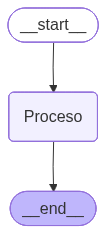

In [64]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
#probando
respuesta = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "*"})
respuesta["resultado"]

'Hola Jack Sparrow, tu resultado es: 24'

In [68]:
respuesta=app.invoke({"name":"Jose", "values" : [10,10,10], "operation" : "+"})
respuesta["resultado"]

'Hola Jose, resultado es: 30'